# Introduction

Predict the house sales. In this analysis it will be covered data exploration, features vizualization, selection of features, making the best suitable model to predict the house sales. 

In the end the RMSE (root-mean-square deviation) score will be minimized much as possible to give good predictions values.

#  

# Prepare the data analysis

Before starting the analysis, it needs some few preparation: loading packages and inspect data.

In [0]:
import os
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


# Load data

Load data from the root directory.
#  

In [0]:
PATH = "/content/"  # Colab path from Google 

print(os.listdir(PATH))

['.config', 'train.csv', 'test.csv', 'sample_submission.csv', 'sample_data']


In [0]:
train_df = pd.read_csv(PATH + "train.csv")
test_df = pd.read_csv(PATH + "test.csv")

# Data exploration
Checking the shape of the data train and test.

In [0]:
print("Train\n rows: {} \n columns: {}\n".format(train_df.shape[0], train_df.shape[1]))
print("Test\n rows: {} \n columns: {}".format(test_df.shape[0], test_df.shape[1]))

Train
 rows: 14882 
 columns: 21

Test
 rows: 6378 
 columns: 20


In [0]:
train_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,120069003,20141201T000000,495000.0,4,3.00,3620,403693,2.0,0,2,3,9,3620,0,1980,0,98022,47.2527,-121.980,2230,148811
1,3630180470,20150205T000000,800000.0,4,2.75,3250,5500,2.0,0,0,3,9,3250,0,2007,0,98027,47.5398,-121.997,3920,6000
2,1235700052,20140630T000000,963000.0,4,3.25,3530,8589,2.0,0,0,3,10,3530,0,2007,0,98033,47.6975,-122.195,2470,9019
3,5631500992,20140515T000000,390000.0,3,2.50,2240,10800,2.0,0,0,3,8,2240,0,1996,0,98028,47.7433,-122.229,1900,9900
4,9310300300,20141013T000000,411000.0,5,1.75,2860,12293,1.0,0,0,4,8,1430,1430,1947,0,98133,47.7385,-122.348,1920,18110


# Check for missing data


In [0]:
def check_missing_data(data):
  # If columns has null values
  sum_null_values = data.isnull().sum()
  total_null_values = sum_null_values.sort_values(ascending=False)
  percent_null_values = (sum_null_values / data.count() * 100).sort_values(ascending=False)
  
  return np.transpose(pd.concat([total_null_values, percent_null_values], axis=1, keys=["Total", "Percent"]))



In [0]:

check_missing_data(train_df)

,sqft_lot15,view,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_living15,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,id
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
check_missing_data(test_df)

,sqft_lot15,sqft_living15,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,id
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


No missing data.

# Features vizualization

Check features type. The info function it will show details about each feature.

In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14882 entries, 0 to 14881
Data columns (total 21 columns):
id               14882 non-null int64
date             14882 non-null object
price            14882 non-null float64
bedrooms         14882 non-null int64
bathrooms        14882 non-null float64
sqft_living      14882 non-null int64
sqft_lot         14882 non-null int64
floors           14882 non-null float64
waterfront       14882 non-null int64
view             14882 non-null int64
condition        14882 non-null int64
grade            14882 non-null int64
sqft_above       14882 non-null int64
sqft_basement    14882 non-null int64
yr_built         14882 non-null int64
yr_renovated     14882 non-null int64
zipcode          14882 non-null int64
lat              14882 non-null float64
long             14882 non-null float64
sqft_living15    14882 non-null int64
sqft_lot15       14882 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.4+ MB


Only the date feature is type object(string), the others are int and float, perfect for the model.

Let's visualize some distribution of each feature.

<Figure size 432x288 with 0 Axes>

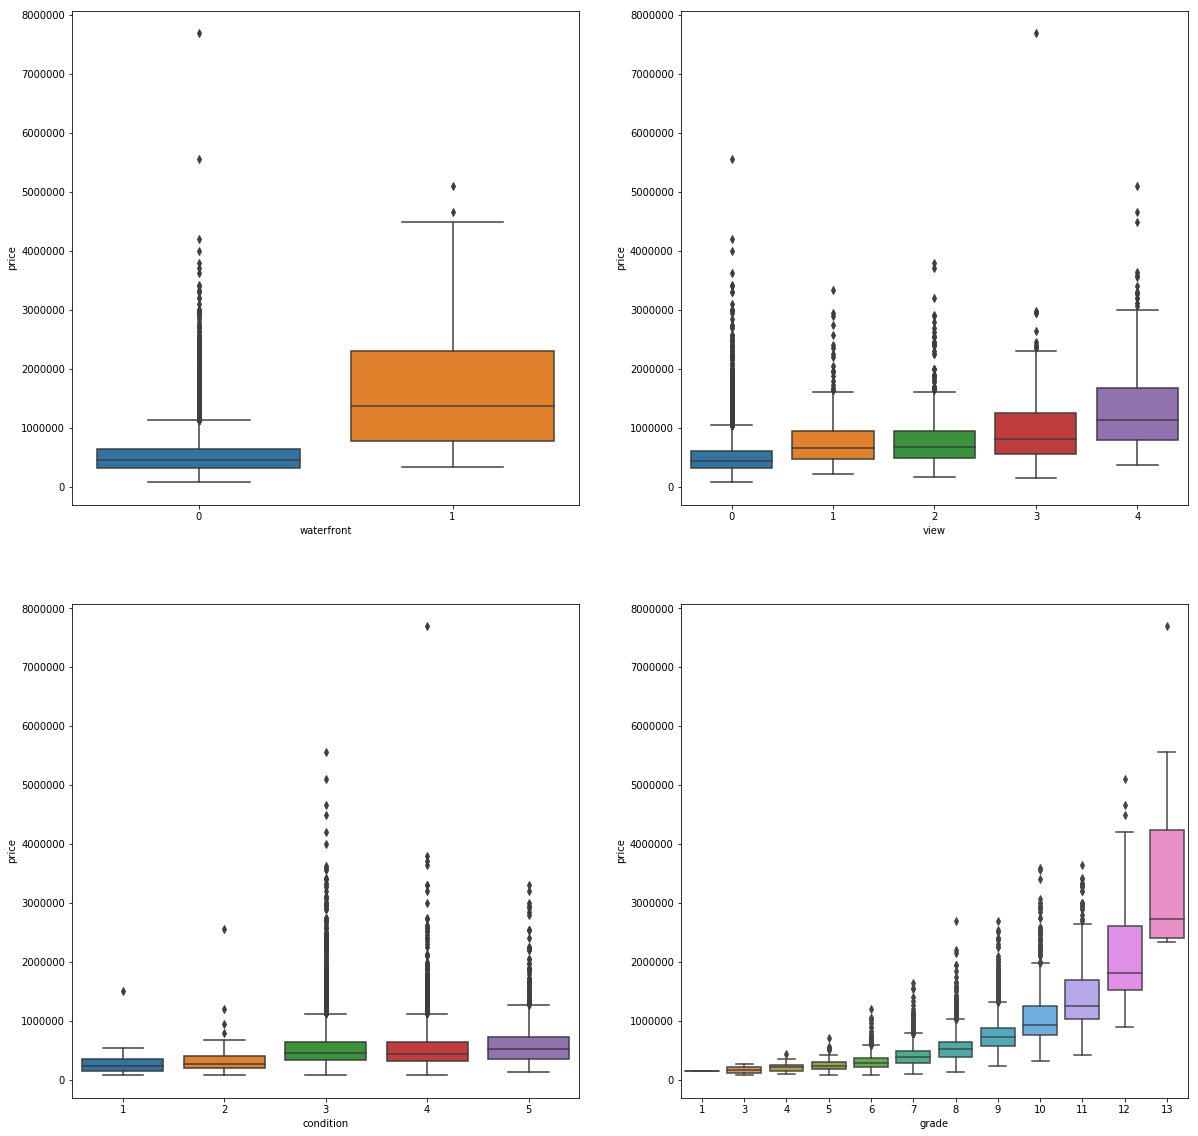

In [0]:
column_feature = ["waterfront", "view", "condition", "grade"]

i = 0
plt.figure()
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
for col in column_feature:
  i += 1
  plt.subplot(2, 2, i)
  sns.boxplot(x=train_df[col],
              y=train_df["price"])
plt.show()

<Figure size 432x288 with 0 Axes>

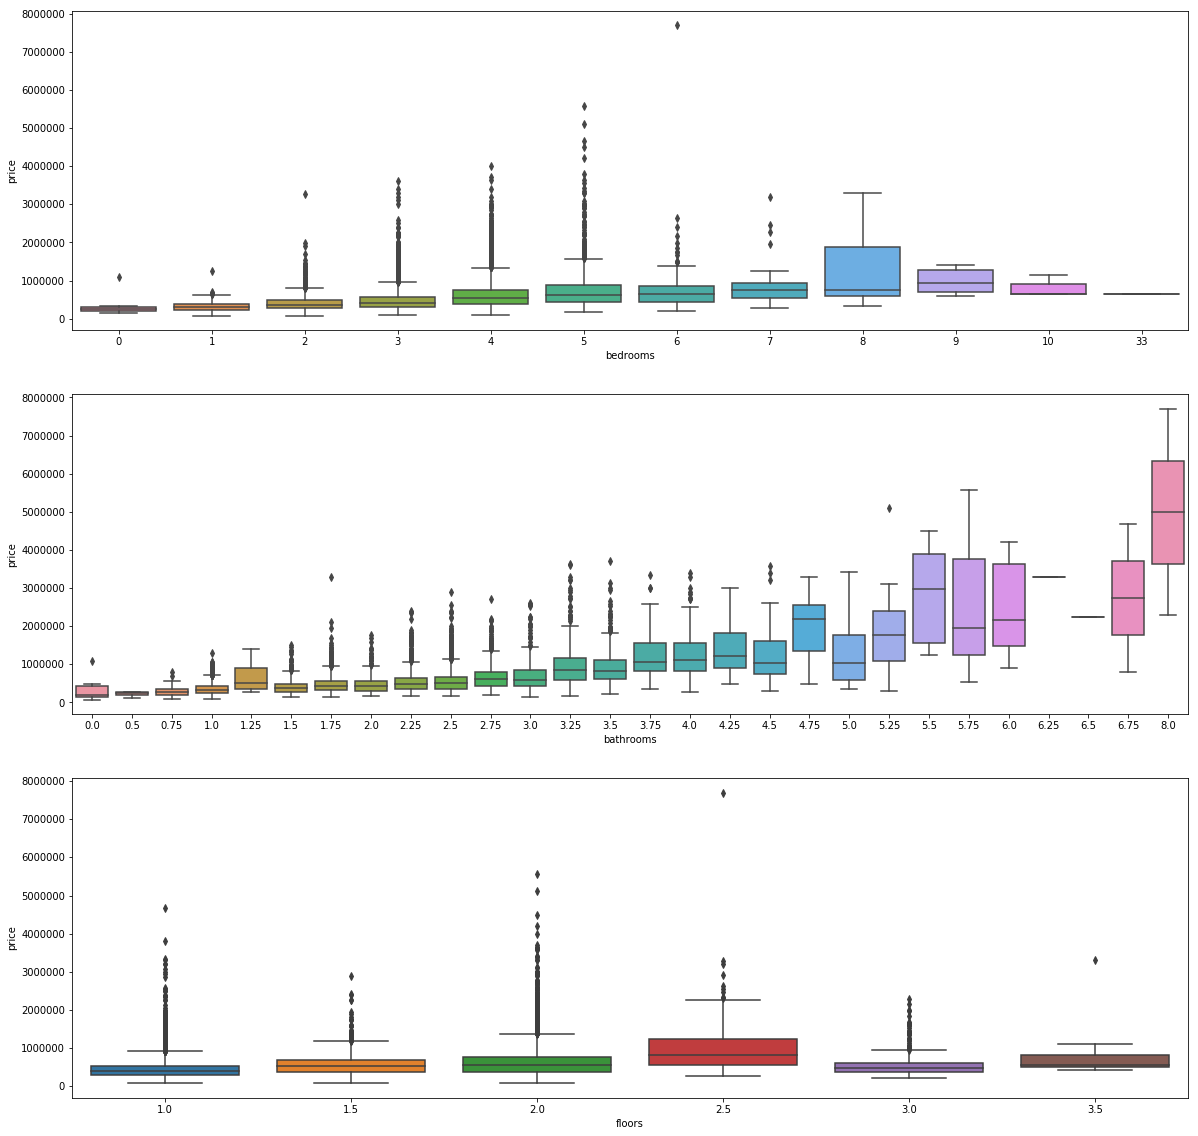

In [0]:
column_features = ["bedrooms", "bathrooms", "floors"]
plt.figure()
i = 0
fig, ax = plt.subplots(1, 3, figsize=(20, 20))
for col in column_features:
  i += 1
  plt.subplot(3, 1, i)
  sns.boxplot(x=train_df[col],
              y=train_df["price"])
plt.show()
  



The numbers of floors and bathrooms are float, it must be converted to int.


In [0]:
train_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,120069003,20141201T000000,495000.0,4,3.00,3620,403693,2.0,0,2,3,9,3620,0,1980,0,98022,47.2527,-121.980,2230,148811
1,3630180470,20150205T000000,800000.0,4,2.75,3250,5500,2.0,0,0,3,9,3250,0,2007,0,98027,47.5398,-121.997,3920,6000
2,1235700052,20140630T000000,963000.0,4,3.25,3530,8589,2.0,0,0,3,10,3530,0,2007,0,98033,47.6975,-122.195,2470,9019
3,5631500992,20140515T000000,390000.0,3,2.50,2240,10800,2.0,0,0,3,8,2240,0,1996,0,98028,47.7433,-122.229,1900,9900
4,9310300300,20141013T000000,411000.0,5,1.75,2860,12293,1.0,0,0,4,8,1430,1430,1947,0,98133,47.7385,-122.348,1920,18110
5,6385800030,20150422T000000,335000.0,4,2.25,2100,7305,1.0,0,0,4,7,1050,1050,1963,0,98188,47.4676,-122.296,1760,7308
6,3885806105,20140521T000000,1580000.0,3,3.25,3690,7200,2.0,0,0,3,11,3690,0,2007,0,98033,47.6815,-122.200,1880,7200
7,5468750040,20150126T000000,415000.0,4,4.00,2740,8250,2.0,0,0,4,9,2740,0,1990,0,98042,47.3735,-122.156,2290,8250
8,4019300680,20141231T000000,449000.0,3,1.75,1660,9697,1.0,0,0,4,7,1660,0,1952,0,98155,47.7564,-122.286,2060,20624
9,3392900080,20140706T000000,625000.0,2,1.75,1990,4000,1.0,0,0,5,7,1090,900,1952,0,98103,47.6889,-122.342,1270,5700


<Figure size 432x288 with 0 Axes>

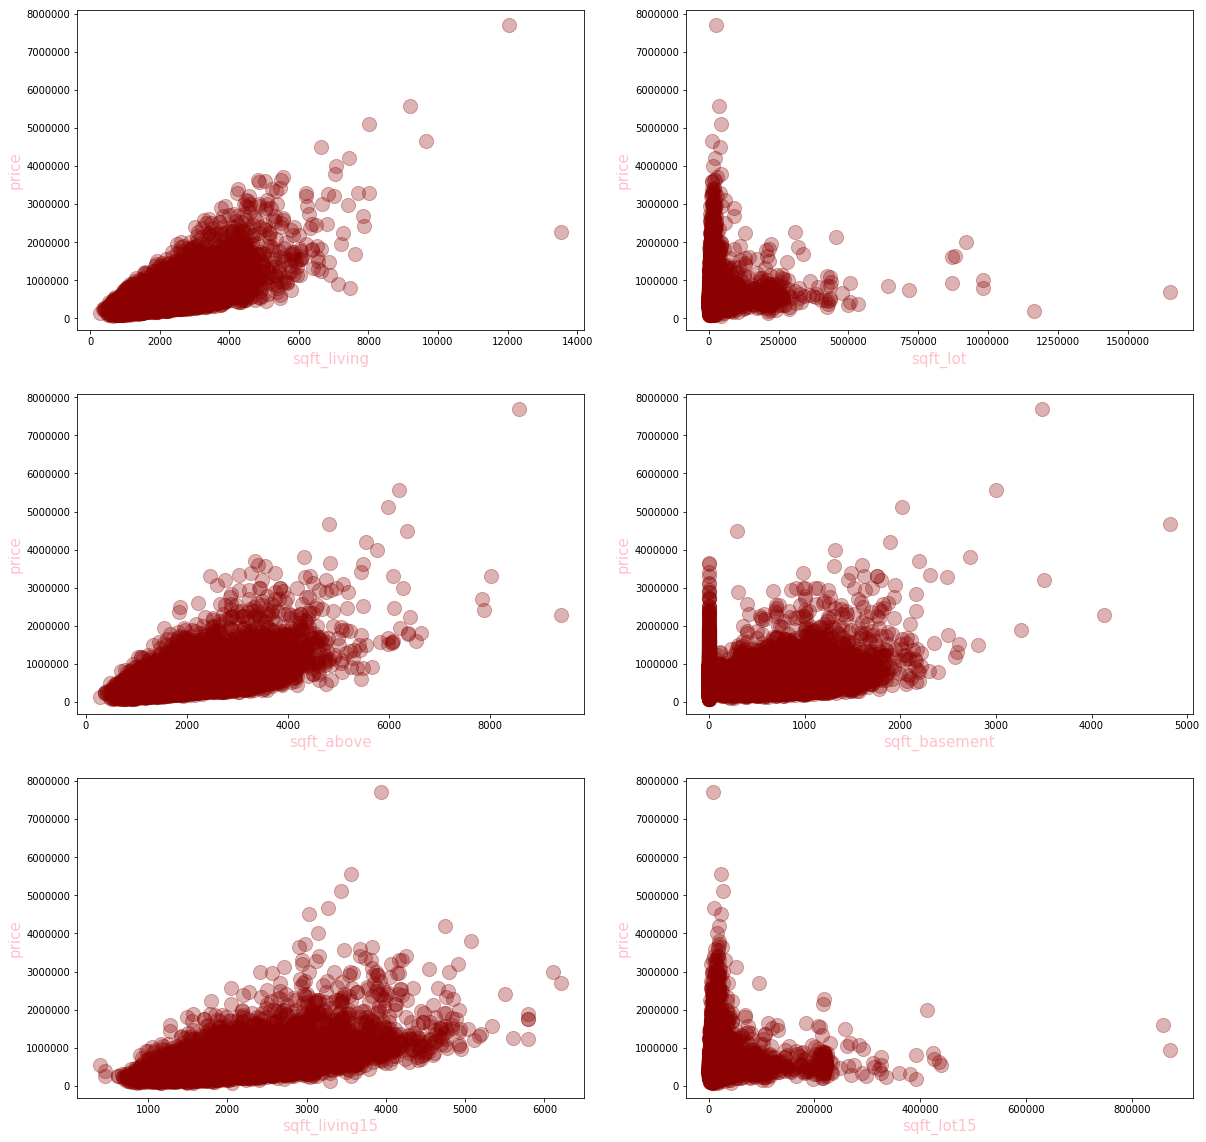

In [0]:
columns_features = ["sqft_living", 
                    "sqft_lot", 
                    "sqft_above",
                    "sqft_basement",
                    "sqft_living15",
                    "sqft_lot15"]

plt.figure()
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
i = 0
for col in columns_features:
  i += 1
  plt.subplot(3, 2, i)
  sns.regplot(x=train_df[col],
              y=train_df["price"],
              fit_reg=False,
              scatter_kws={"color":"darkred","alpha":0.3,"s":200})
  plt.xlabel(col, fontsize=15, color="pink")
  plt.ylabel("price", fontsize=15, color="pink")
plt.show()

In [0]:
train_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,120069003,20141201T000000,495000.0,4,3.00,3620,403693,2.0,0,2,3,9,3620,0,1980,0,98022,47.2527,-121.980,2230,148811
1,3630180470,20150205T000000,800000.0,4,2.75,3250,5500,2.0,0,0,3,9,3250,0,2007,0,98027,47.5398,-121.997,3920,6000
2,1235700052,20140630T000000,963000.0,4,3.25,3530,8589,2.0,0,0,3,10,3530,0,2007,0,98033,47.6975,-122.195,2470,9019
3,5631500992,20140515T000000,390000.0,3,2.50,2240,10800,2.0,0,0,3,8,2240,0,1996,0,98028,47.7433,-122.229,1900,9900
4,9310300300,20141013T000000,411000.0,5,1.75,2860,12293,1.0,0,0,4,8,1430,1430,1947,0,98133,47.7385,-122.348,1920,18110
5,6385800030,20150422T000000,335000.0,4,2.25,2100,7305,1.0,0,0,4,7,1050,1050,1963,0,98188,47.4676,-122.296,1760,7308
6,3885806105,20140521T000000,1580000.0,3,3.25,3690,7200,2.0,0,0,3,11,3690,0,2007,0,98033,47.6815,-122.200,1880,7200
7,5468750040,20150126T000000,415000.0,4,4.00,2740,8250,2.0,0,0,4,9,2740,0,1990,0,98042,47.3735,-122.156,2290,8250
8,4019300680,20141231T000000,449000.0,3,1.75,1660,9697,1.0,0,0,4,7,1660,0,1952,0,98155,47.7564,-122.286,2060,20624
9,3392900080,20140706T000000,625000.0,2,1.75,1990,4000,1.0,0,0,5,7,1090,900,1952,0,98103,47.6889,-122.342,1270,5700


<Figure size 432x288 with 0 Axes>

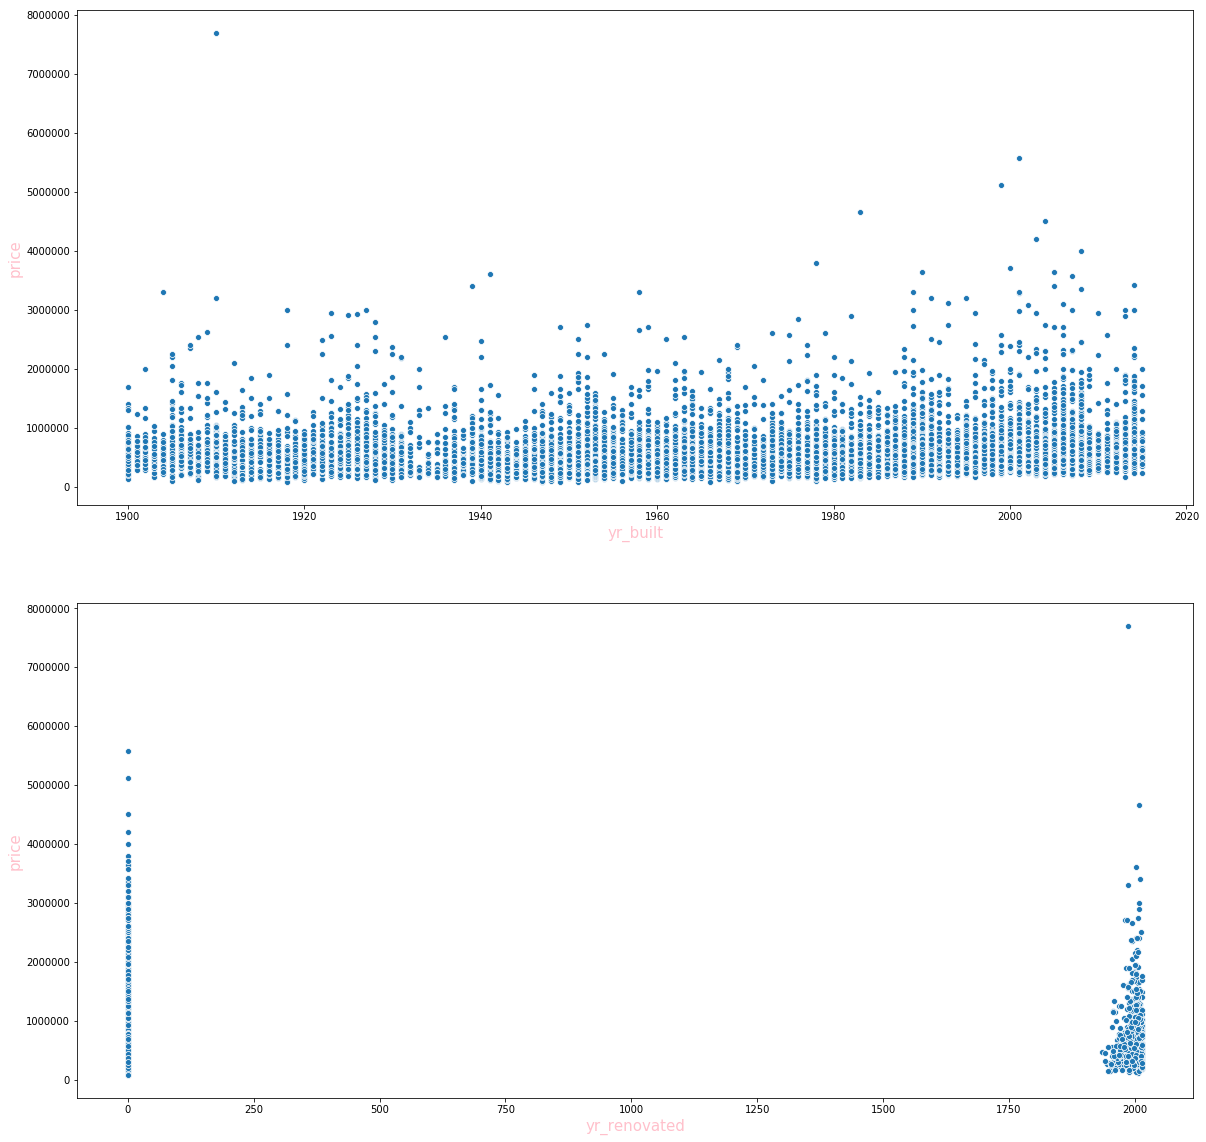

In [0]:
# TODO yr lat, long, zip
columns_features = ["yr_built", "yr_renovated"]

plt.figure()
i = 0
fig, ax = plt.subplots(2, 1, figsize=(20, 20))
for col in columns_features:
  i += 1
  plt.subplot(2, 1, i)
  sns.scatterplot(x=train_df[col],
                  y=train_df["price"])
  plt.xlabel(col, fontsize=15, color="pink")
  plt.ylabel("price", fontsize=15, color="pink")
plt.show()

In [0]:
train_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,120069003,20141201T000000,495000.0,4,3.00,3620,403693,2.0,0,2,3,9,3620,0,1980,0,98022,47.2527,-121.980,2230,148811
1,3630180470,20150205T000000,800000.0,4,2.75,3250,5500,2.0,0,0,3,9,3250,0,2007,0,98027,47.5398,-121.997,3920,6000
2,1235700052,20140630T000000,963000.0,4,3.25,3530,8589,2.0,0,0,3,10,3530,0,2007,0,98033,47.6975,-122.195,2470,9019
3,5631500992,20140515T000000,390000.0,3,2.50,2240,10800,2.0,0,0,3,8,2240,0,1996,0,98028,47.7433,-122.229,1900,9900
4,9310300300,20141013T000000,411000.0,5,1.75,2860,12293,1.0,0,0,4,8,1430,1430,1947,0,98133,47.7385,-122.348,1920,18110
5,6385800030,20150422T000000,335000.0,4,2.25,2100,7305,1.0,0,0,4,7,1050,1050,1963,0,98188,47.4676,-122.296,1760,7308
6,3885806105,20140521T000000,1580000.0,3,3.25,3690,7200,2.0,0,0,3,11,3690,0,2007,0,98033,47.6815,-122.200,1880,7200
7,5468750040,20150126T000000,415000.0,4,4.00,2740,8250,2.0,0,0,4,9,2740,0,1990,0,98042,47.3735,-122.156,2290,8250
8,4019300680,20141231T000000,449000.0,3,1.75,1660,9697,1.0,0,0,4,7,1660,0,1952,0,98155,47.7564,-122.286,2060,20624
9,3392900080,20140706T000000,625000.0,2,1.75,1990,4000,1.0,0,0,5,7,1090,900,1952,0,98103,47.6889,-122.342,1270,5700


Text(0.5, 0, 'Price')

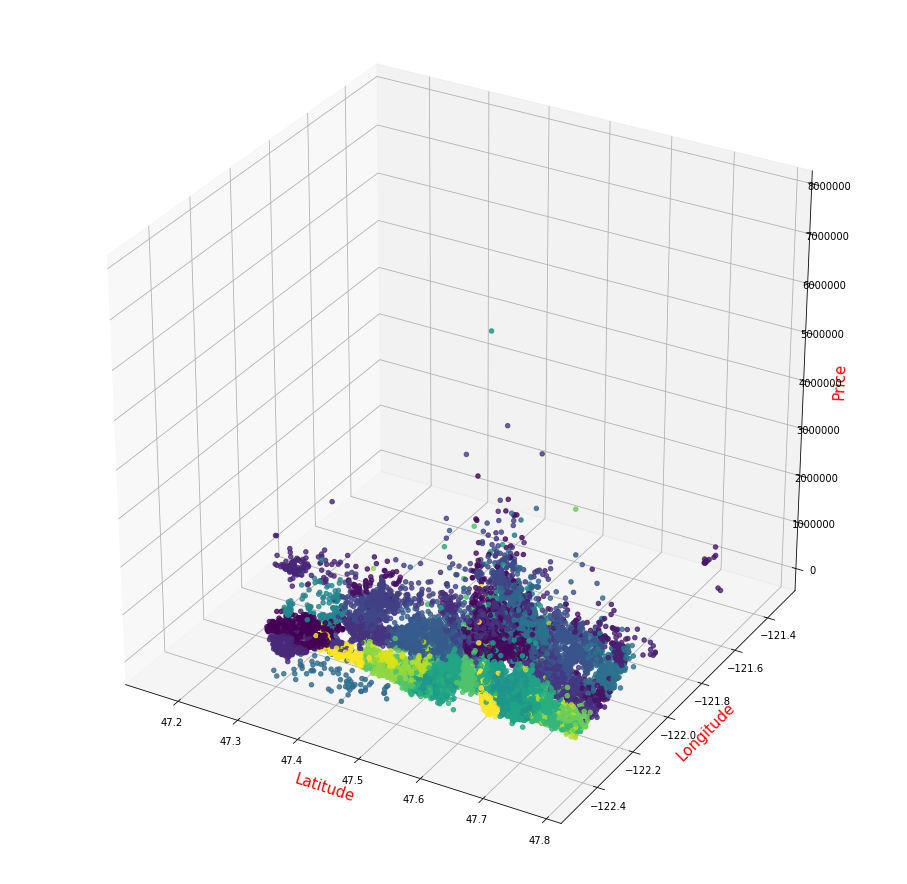

In [0]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(16,16))
ax=fig.add_subplot(1,1,1, projection="3d")
ax.scatter(train_df["lat"],
           train_df["long"],
           train_df["price"], 
           c=train_df["zipcode"],
           alpha=.8)
ax.set_xlabel("Latitude", fontsize=15, color="red")
ax.set_ylabel("Longitude", fontsize=15, color="red")
ax.set_zlabel("Price", fontsize=15, color="red")

Text(0, 0.5, 'Longitude')

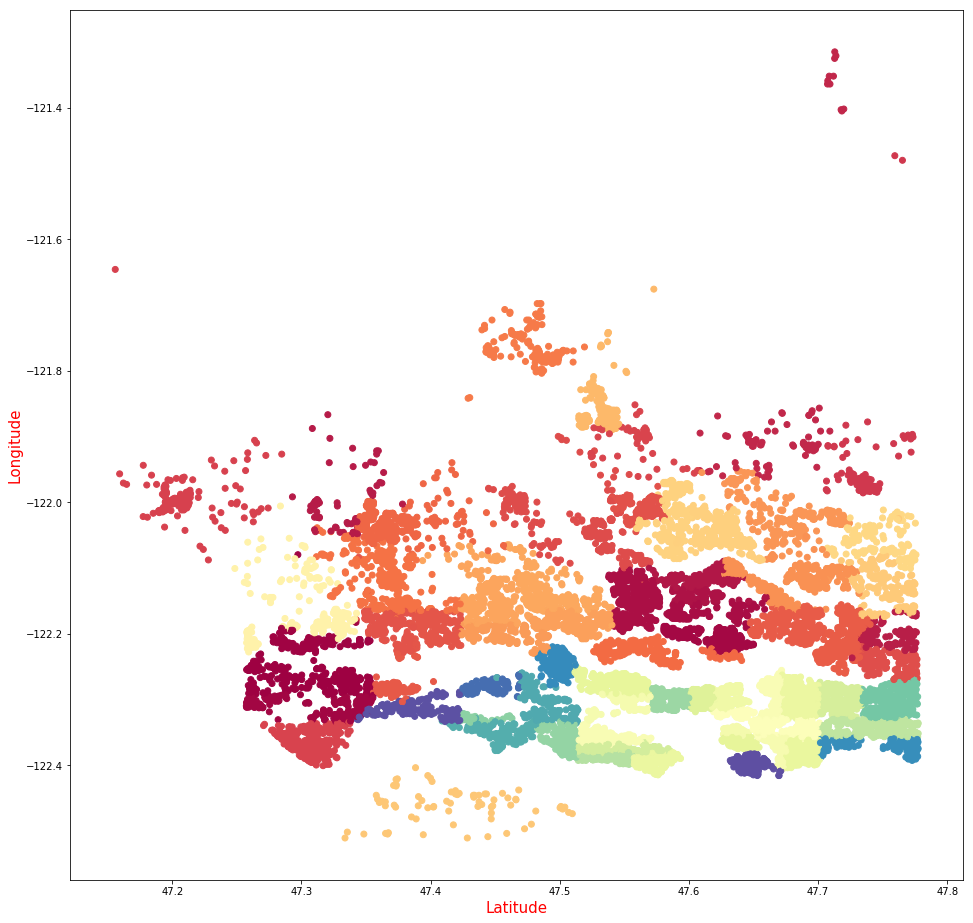

In [0]:
plt.figure(figsize=(16,16))
plt.scatter(x=train_df["lat"],
            y=train_df["long"],
            c=train_df["zipcode"], 
            cmap="Spectral")
plt.xlabel("Latitude", fontsize=15, color="red")
plt.ylabel("Longitude", fontsize=15, color="red")

Next will be some features engineering.


In [0]:
for df in [train_df, test_df]:
  df["bathrooms"] = (np.floor(df["bathrooms"])).astype(int)
  df["floors"] = df["floors"].astype(int)
  # TODO good strategy for yr_built, yr_renovated and our year(2019)


In [0]:
train_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,120069003,20141201T000000,495000.0,4,3,3620,403693,2,0,2,3,9,3620,0,1980,0,98022,47.2527,-121.980,2230,148811
1,3630180470,20150205T000000,800000.0,4,2,3250,5500,2,0,0,3,9,3250,0,2007,0,98027,47.5398,-121.997,3920,6000
2,1235700052,20140630T000000,963000.0,4,3,3530,8589,2,0,0,3,10,3530,0,2007,0,98033,47.6975,-122.195,2470,9019
3,5631500992,20140515T000000,390000.0,3,2,2240,10800,2,0,0,3,8,2240,0,1996,0,98028,47.7433,-122.229,1900,9900
4,9310300300,20141013T000000,411000.0,5,1,2860,12293,1,0,0,4,8,1430,1430,1947,0,98133,47.7385,-122.348,1920,18110
5,6385800030,20150422T000000,335000.0,4,2,2100,7305,1,0,0,4,7,1050,1050,1963,0,98188,47.4676,-122.296,1760,7308
6,3885806105,20140521T000000,1580000.0,3,3,3690,7200,2,0,0,3,11,3690,0,2007,0,98033,47.6815,-122.200,1880,7200
7,5468750040,20150126T000000,415000.0,4,4,2740,8250,2,0,0,4,9,2740,0,1990,0,98042,47.3735,-122.156,2290,8250
8,4019300680,20141231T000000,449000.0,3,1,1660,9697,1,0,0,4,7,1660,0,1952,0,98155,47.7564,-122.286,2060,20624
9,3392900080,20140706T000000,625000.0,2,1,1990,4000,1,0,0,5,7,1090,900,1952,0,98103,47.6889,-122.342,1270,5700


Put the feature in a separeted variables. 

In [0]:
# Training data
X = train_df.iloc[:, list(range(3, train_df.columns.size))].values
y = train_df.iloc[:, [2]].values

# Test data
X_test = test_df.iloc[:, list(range(2, test_df.columns.size))].values

Standard Scaler for X and y

In [0]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X.astype(float))
X_test_scaled = sc.fit_transform(X_test.astype(float))

# Select k best feature from data

In [0]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select half of columns
K_COLUMNS = train_df.shape[1] // 2
train_new_df = SelectKBest(f_regression, k=K_COLUMNS).fit_transform(X_scaled, y)

(14882, 21)
(14882, 10)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Building a baseline model

Start a basic model, but first data must be splited.

In [0]:
# Split data into 80% train_data and 20% test_data
VALID_SIZE = 0.2

# Random state for reproducibility
RANDOM_STATE = 2019

X_train, X_valid_test, y_train, y_valid_test = train_test_split(train_new_df,  # train_new_df
                                                                y,
                                                                test_size=VALID_SIZE,
                                                                random_state=RANDOM_STATE,
                                                                shuffle=True)

In [0]:
RFC_METRIC = "mse"  # Metric used for RandomForestClassifier
NUM_ESTIMATORS = 100  # Number of estimators for RandomForestClassifier
NO_JOBS = 4  # Number of parallel jobs used for RandomForestClassifier

In [0]:
model = RandomForestRegressor(n_jobs=NO_JOBS,
                               random_state=RANDOM_STATE,
                               criterion=RFC_METRIC,
                               verbose=True)

In [0]:
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                      oob_score=False, random_state=2019, verbose=True,
                      warm_start=False)

In [0]:
preds = model.predict(X_valid_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


In [0]:
print("RF Model score: ", model.score(X_train, y_train))

RF Model score:  0.9565191539239034


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


In [0]:
def rmse(preds, y):
    return np.sqrt(mean_squared_error(preds, y))

In [0]:
print("Root mean squared error (valid set):",round(rmse(preds, y_valid_test), 5))

Root mean squared error (valid set): 173162.12466


# Submission

Prepare for submission file.

In [0]:
predictions_RF = model.predict(X_test_scaled)
submission = pd.read_csv(PATH+"sample_submission.csv")
submission["price"] = predictions_RF
submission.to_csv("submission.csv", index=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
